# Lab 11: Sorting

## <font color=DarkRed>Your Exercise: Analyse Sorting Algorithms.</font>

Using random number generation (as I have done in class) use timing analysis to compare Bubblesort, InsertionSort, Selectionsort, Shellsort, Mergesort, Quicksort.

This will require lists larger than 500 to get good timings. Adjust for your computer's capabilities. Provide meaningful plots of these results using Matplotlib.

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

In [1]:
import random
import time
import matplotlib.pyplot as plt
from random import sample

In [2]:
def bubble_sort(alist):
    exchanges = True
    passnum = len(alist) - 1
    
    while passnum > 0 and exchanges:
        exchanges = False
        for i in range(passnum):
            if alist[i] > alist[i+1]:
                exchanges = True
                alist[i], alist[i+1] = alist[i+1], alist[i]
                
        passnum -= 1

In [3]:
def insertion_sort(alist):
    for index in range(1, len(alist)):
        current_value = alist[index]
        position = index
        
        while position > 0 and alist[position-1] > current_value:
            alist[position] = alist[position-1]
            position -= 1 
            
        alist[position] = current_value

In [4]:
def selection_sort(alist):  
    for fillslot in range(len(alist)-1, 0, -1):
        position_of_max = 0
        for location in range(1, fillslot+1):
            if alist[location] > alist[position_of_max]:
                position_of_max = location
        alist[fillslot], alist[position_of_max] = alist[position_of_max], alist[fillslot]

In [5]:
def shell_sort(alist):
    sublistcount = len(alist)//2
    gap = sublistcount

    while sublistcount > 0:
        for start_position in range(sublistcount):
            gap_insertion_sort(alist, start_position, sublistcount)
        
        sublistcount = sublistcount//2
        
def gap_insertion_sort(alist, start, gap):
    for i in range(start+gap, len(alist), gap):
        current_value = alist[i]
        position = i
        
        while position >= gap and alist[position-gap] > current_value:
            alist[position] = alist[position-gap]
            position = position-gap

In [6]:
def merge_sort(alist):
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i = 0
        j = 0
        k = 0
        
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
            k += 1                
        
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i += 1
            k+= 1
            
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j += 1
            k += 1        

In [7]:
def quick_sort(alist):
    quick_sort_helper(alist, 0, len(alist)-1)

def quick_sort_helper(alist, first, last):
    if first < last:
        splitpoint = partition(alist, first, last)
        quick_sort_helper(alist, first, splitpoint-1)
        quick_sort_helper(alist, splitpoint+1, last)
        
def partition(alist, first, last):
    pivotvalue = alist[first]
    
    leftmark = first+1
    rightmark = last
    
    done = False
    
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark += 1
            
        while rightmark >= leftmark and alist[rightmark] >= pivotvalue:
            rightmark -= 1
            
        if rightmark < leftmark:
            done = True
        else:
            alist[leftmark], alist[rightmark] = alist[rightmark], alist[leftmark]
            
    alist[first], alist[rightmark] = alist[rightmark], alist[first]
    
    return rightmark

## timing

In [8]:
N = []
for i in range(1000,2000,100):
    N.append(i)


In [23]:
nums = (range(10000), k=2000)


In [9]:
nums = sample(range(10000), k=2000)
bubble_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    bubble_sort(alist)
    end = time.perf_counter()
    bubble_sort_time.append(end-start)

In [10]:
nums = sample(range(10000), k=2000)
insertion_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    insertion_sort(alist)
    end = time.perf_counter()
    insertion_sort_time.append(end-start)

In [11]:
nums = sample(range(10000), k=2000)
selection_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    selection_sort(alist)
    end = time.perf_counter()
    selection_sort_time.append(end-start)

In [12]:
nums = sample(range(10000), k=2000)
shell_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    shell_sort(alist)
    end = time.perf_counter()
    shell_sort_time.append(end-start)

In [13]:
nums = sample(range(10000), k=2000)
merge_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    merge_sort(alist)
    end = time.perf_counter()
    merge_sort_time.append(end-start)

In [14]:
nums = sample(range(10000), k=2000)
quick_sort_time=[]
for n in N:
    alist=random.sample(nums, n)
    start = time.perf_counter()
    quick_sort(alist)
    end = time.perf_counter()
    quick_sort_time.append(end-start)


## plots

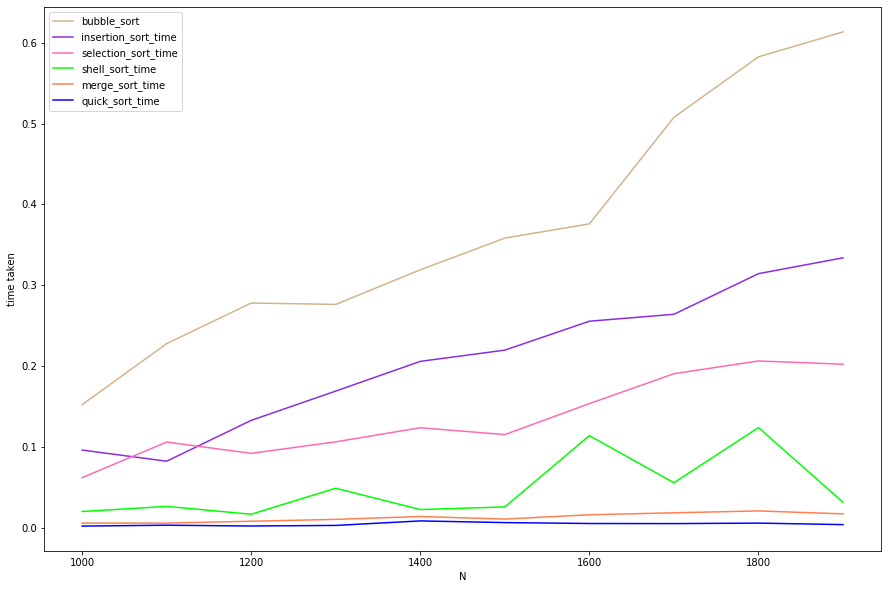

In [16]:
plt.figure(figsize=(15,10))
plt.plot(N, bubble_sort_time, label = 'bubble_sort', color='tan')
plt.plot(N, insertion_sort_time, label = 'insertion_sort_time', color='blueviolet')
plt.plot(N, selection_sort_time, label = 'selection_sort_time', color='hotpink')
plt.plot(N, shell_sort_time, label = 'shell_sort_time', color='lime')
plt.plot(N, merge_sort_time, label = 'merge_sort_time', color='coral')
plt.plot(N, quick_sort_time, label = 'quick_sort_time',color= 'blue')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

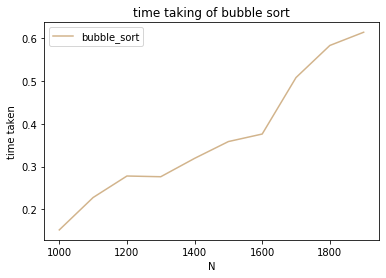

In [17]:
plt.title("time taking of bubble sort")
plt.plot(N, bubble_sort_time, label = 'bubble_sort',color='tan')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

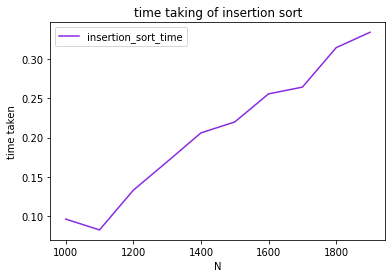

In [18]:
plt.title("time taking of insertion sort")
plt.plot(N, insertion_sort_time, label = 'insertion_sort_time',color='blueviolet')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

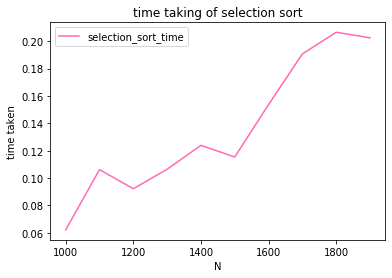

In [19]:
plt.title("time taking of selection sort")
plt.plot(N, selection_sort_time, label = 'selection_sort_time', color='hotpink')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

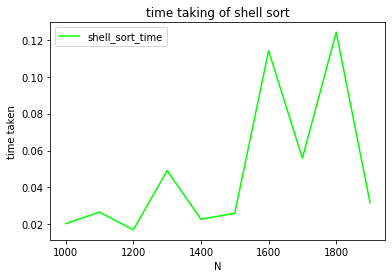

In [20]:
plt.title("time taking of shell sort")
plt.plot(N, shell_sort_time, label = 'shell_sort_time',color='lime')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

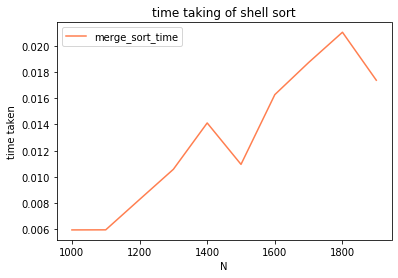

In [21]:
plt.title("time taking of shell sort")
plt.plot(N, merge_sort_time, label = 'merge_sort_time', color= 'coral')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()

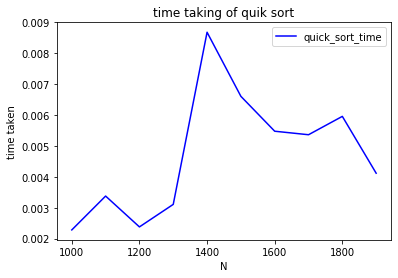

In [22]:
plt.title("time taking of quik sort")
plt.plot(N, quick_sort_time, label = 'quick_sort_time',color= 'blue')
plt.legend()
plt.ylabel('time taken')
plt.xlabel('N')
plt.show()